### Project: Investigate a Dataset ( fuel economy data provided by the EPA)
#### Table of Contents:
1. [Introduction](#Introduction:)
2. [Data Wrangling](#Data-Wrangling)
3. [Exploratory Data Analysis](#Exploring-with-Visuals)
4. [Conclusions](#Conclusions:)
5. [Limitations:](#Limitations:)
6. [Question 1](#Question-1)
7. [Question 2](#Question-2)
8. [Question 3](#Question-3)
9. [Question 4](#Question-4)

# Introduction:
In this Case, I will tackle a real-world data set [DataSet](https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy),using python libraries (Pandas, NumPy, Matplotlib) to analyze a data set of the fuel economy data provided by the EPA.
### Question that can answered from this data set:
1. Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
2. How much have vehicle classes improved in fuel economy (increased in mpg)?
3. What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
4. What features are associated with better fuel economy (mpg)?

# Data Wrangling

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [5]:
df_08=pd.read_csv("all_alpha_08.csv",sep=",")
df_18=pd.read_csv("all_alpha_18.csv",sep=",")

In [6]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [7]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


# Assessing_Data

In [8]:
#number of samples in dataset
#number of columns in dataset
df_08.shape

(2404, 18)

In [9]:
df_18.shape

(1611, 18)

In [10]:
#number of duplicated rows in dataset
df_08.duplicated().sum()

25

In [11]:
df_18.duplicated().sum()

0

In [12]:
#number of missing values
df_08.isnull().sum().sum()

1685

In [13]:
df_18.isnull().sum().sum()

4

In [14]:
#datatypes of columns
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [15]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [16]:
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [17]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [18]:
#features with missing values
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [19]:
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [20]:
#number of non-null unique values for features in each dataset
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [21]:
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [22]:
#Find rows with missing data in df_08
missing_rows_08 =len(df_08[df_08.isnull().any(axis=1)])
missing_rows_08

199

In [23]:
missing_rows_18 =len(df_18[df_18.isnull().any(axis=1)])
missing_rows_18

2

In [24]:
#Cleaning unneeded Column Labels
df_08.drop(columns=['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], inplace=True)

In [25]:
df_18.drop(columns=['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], inplace=True)

In [26]:
#Rename Columns
df_08.rename(columns={'Sales Area' :'Cert Region'}, inplace=True)

In [27]:
#Rename all column labels to replace spaces with underscores and convert everything to lowercase
#strip() method that returns a copy of the string with leading and trailing whitespaces removed.
df_08.rename(columns=lambda x: x.lower().strip().replace(' ', '_'), inplace=True)

In [28]:
df_18.rename(columns=lambda x: x.lower().strip().replace(' ', '_'), inplace=True)

In [29]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [30]:
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [31]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

In [32]:
#Filter data set to select only rows where cert_region is CA
df_08 = df_08.query('cert_region =="CA"')

In [33]:
df_18 = df_18.query('cert_region =="CA"')

In [34]:
#confirm only certification region is California
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [35]:
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [36]:
# drop certification region columns form both datasets
df_08.drop('cert_region', axis=1, inplace=True)

In [37]:
df_18.drop('cert_region', axis=1, inplace=True)

### Drop Rows with Missing Values

In [38]:
df_08.dropna(inplace=True)

In [39]:
df_18.dropna(inplace=True)

In [40]:
df_08.isnull().sum().any()

False

In [41]:
df_18.isnull().sum().any()

False

In [42]:
# drop duplicates in dataset
df_08.drop_duplicates(inplace=True)

In [43]:
df_18.drop_duplicates(inplace=True)

In [44]:
df_08.duplicated().sum().any()

False

In [45]:
df_18.duplicated().sum().any()

False

## Fixing Data Types

In [46]:
#use a regular expression to find all the digits in the string and then convert the result to an integer.
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

In [47]:
df_08['greenhouse_gas_score']=df_08['greenhouse_gas_score'].astype('int64')

ValueError: invalid literal for int() with base 10: '7/6'

In [ ]:
df_18['cyl'] = df_18['cyl'].astype(int)

In [ ]:
df_18['air_pollution_score']=df_18['air_pollution_score'].astype(float)

In [ ]:
df_08['air_pollution_score']=df_08['air_pollution_score'].astype(float)

### To Solve This Problem in 2008

In [48]:
df_08[df_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [49]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [50]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

In [51]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [52]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [53]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [54]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

C:\Users\Khallaf\AppData\Local\Temp\ipykernel_7080\553349515.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = df1.append(df2)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [55]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

C:\Users\Khallaf\AppData\Local\Temp\ipykernel_7080\2829982403.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_08 = df_08.append(new_rows, ignore_index=True)


In [56]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [57]:
df_08.shape

(987, 13)

In [58]:
df_08['air_pollution_score']=df_08['air_pollution_score'].astype(float)

### Solve fuel Problem in 2018

In [59]:
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6.0,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


In [60]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy() 
df2 = hb_18.copy()

In [61]:
# list of columns to split
split_columns =  ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']


# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [62]:
# combine dataframes to add to the original dataframe
new_rows = pd.concat([df1, df2], ignore_index=True)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
1,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
2,BMW 530e,2.0,4.0,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
3,BMW 740e,2.0,4.0,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
4,CHEVROLET Impala,3.6,6.0,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,TOYOTA Sequoia FFV,5.7,8.0,SemiAuto-6,4WD,Gas,standard SUV,5,13,17,14,1,No
72,TOYOTA Tundra FFV,5.7,8.0,SemiAuto-6,4WD,Gas,pickup,5,13,17,15,2,No
73,VOLVO S90,2.0,4.0,SemiAuto-8,4WD,Electricity,midsize car,7,70,72,71,10,Elite
74,VOLVO XC 60,2.0,4.0,SemiAuto-8,4WD,Electricity,small SUV,7,60,58,59,10,Elite


In [63]:
# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)

C:\Users\Khallaf\AppData\Local\Temp\ipykernel_7080\1414283916.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_18 = df_18.append(new_rows, ignore_index=True)


In [64]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [65]:
# convert mpg columns to floats in:(08,18)
mpg_columns = ['city_mpg','hwy_mpg','cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

In [66]:
df_18.shape

(832, 13)

In [67]:
df_08.dtypes == df_18.dtypes

model                    True
displ                    True
cyl                     False
trans                    True
drive                    True
fuel                     True
veh_class                True
air_pollution_score     False
city_mpg                 True
hwy_mpg                  True
cmb_mpg                  True
greenhouse_gas_score    False
smartway                 True
dtype: bool

In [68]:
# Save final CLEAN datasets as new files!
df_08.to_csv('cleaned_08.csv', index=False)
df_18.to_csv('cleaned_18.csv', index=False)

In [69]:
df_08 = pd.read_csv("cleaned_08.csv")
df_18= pd.read_csv("cleaned_18.csv")

# Exploring with Visuals

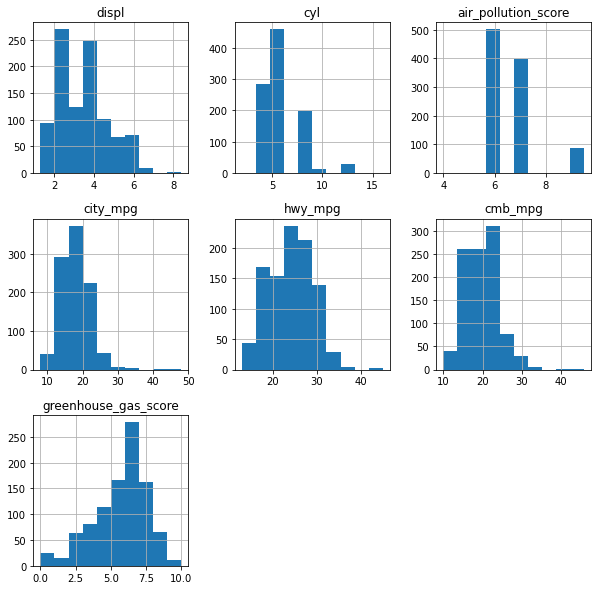

In [70]:
#Compare the distributions 
df_08.hist(figsize=(10,10));

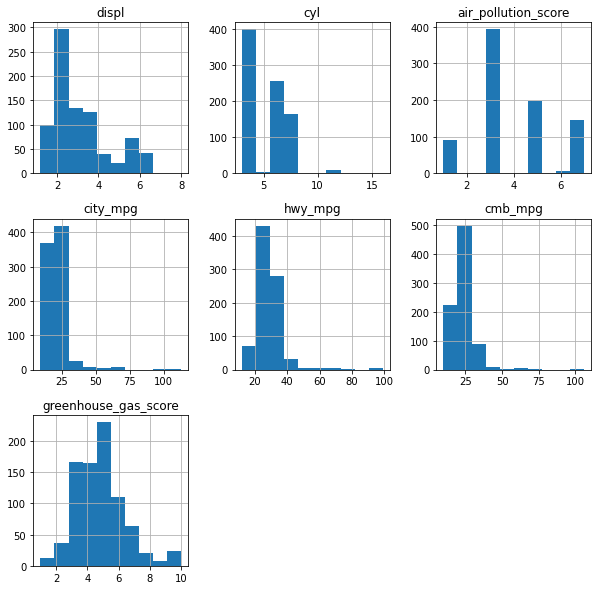

In [71]:
df_18.hist(figsize=(10,10));

Describe the correlations 

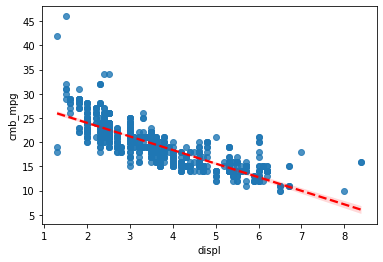

In [72]:
sns.regplot(x='displ', y='cmb_mpg', data=df_08,line_kws={'linestyle':'--',"color": "red"});

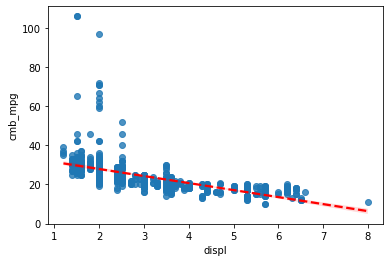

In [73]:
sns.regplot(x='displ', y='cmb_mpg', data=df_18,line_kws={'linestyle':'--',"color": "red"});

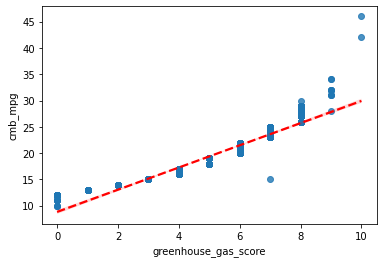

In [74]:
sns.regplot(x='greenhouse_gas_score', y='cmb_mpg', data=df_08,line_kws={'linestyle':'--',"color": "red"});

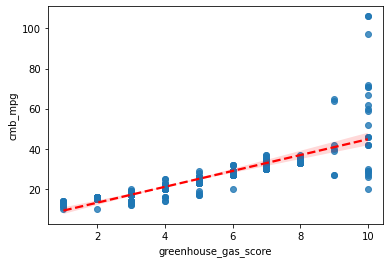

In [75]:
sns.regplot(x='greenhouse_gas_score', y='cmb_mpg', data=df_18,line_kws={'linestyle':'--',"color": "red"});

# Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

In [76]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [77]:
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [78]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [79]:
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

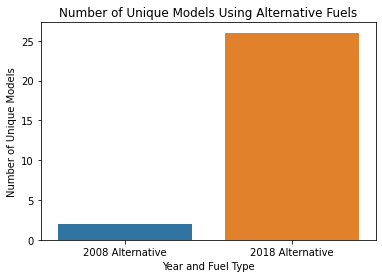

In [80]:
#Data
labels = ['2008 Alternative', '2018 Alternative']
values = [alt_08, alt_18]

# Seaborn Bar Plot
sns.barplot(x=labels, y=values)
plt.title('Number of Unique Models Using Alternative Fuels')
plt.xlabel('Year and Fuel Type')
plt.ylabel('Number of Unique Models')

plt.show()


In [81]:
# total unique models in each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [82]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

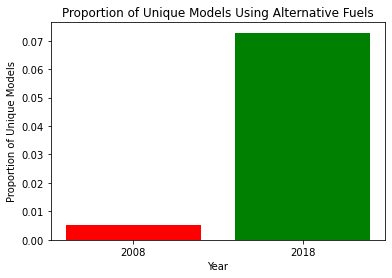

In [83]:
colors = ['red', 'green']
plt.bar(["2008", "2018"], [prop_08, prop_18],color=colors)
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

as we see there are more models using alternative fuels in 2018 compared to 2008 increased By 24 different model and Proportion of Unique Models Using Alternative Fuels in 2018 compared to 2008 .

# Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?

In [84]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [85]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [101]:
x_08=veh_08.sum()

In [102]:
x_18=veh_18.sum()

In [103]:
y=x_18-x_08

In [105]:
percentage=y/x_08
percentage

0.3412331308012864

In [87]:
# how much they've increased by for each vehicle class
increased_by = veh_18 - veh_08
increased_by

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

C:\Users\Khallaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


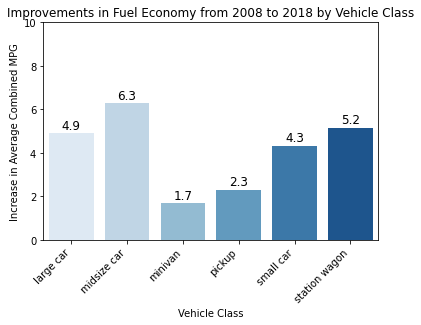

In [88]:
# only plot the classes that exist in both years
increased_by.dropna(inplace=True)
x=increased_by.index
y=increased_by
sns.barplot(x,y,palette = 'Blues')
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Increase in Average Combined MPG')
plt.ylim([0, 10])
for i, val in enumerate(increased_by.values):
    plt.text(i, val+0.2, '{:.1f}'.format(val), ha='center', fontsize=12);
warnings.filterwarnings('ignore')

# Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

In [89]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [90]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [91]:
m_08=smart_08.cmb_mpg.mean()
m_08

23.736842105263158

In [92]:
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [93]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [94]:
m_18=smart_18.cmb_mpg.mean()
m_18

37.361111111111114

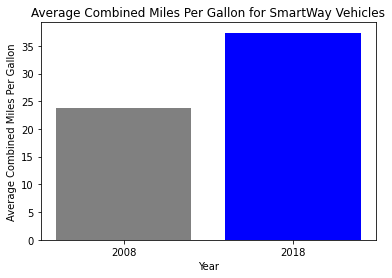

In [95]:
colors = ['gray', 'blue']
plt.bar(["2008", "2018"], [m_08, m_18],color=colors)
plt.title('Average Combined Miles Per Gallon for SmartWay Vehicles')
plt.xlabel('Year')
plt.ylabel('Average Combined Miles Per Gallon')
plt.show()

# Q4: What features are associated with better fuel economy (mpg)?

In [96]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


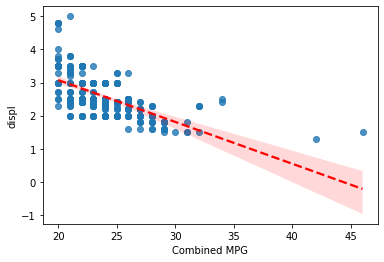

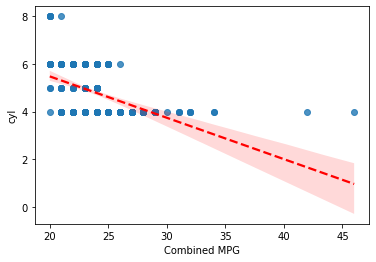

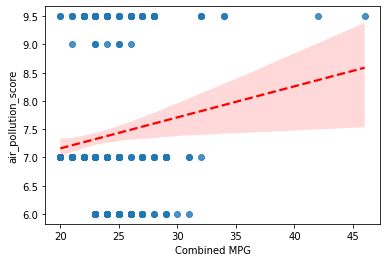

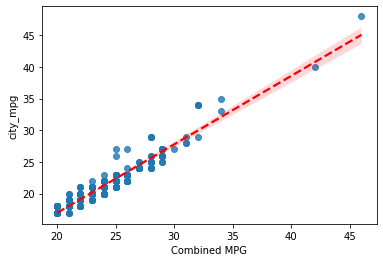

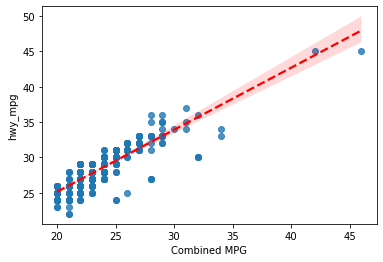

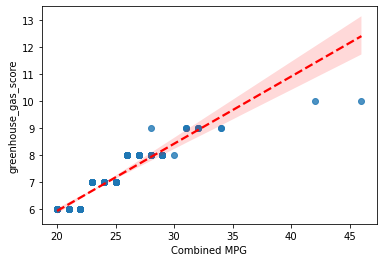

In [97]:
for col in ['displ','cyl','air_pollution_score','city_mpg','hwy_mpg','cmb_mpg','greenhouse_gas_score']:
    # Check if the column is not cmb_mpg
    if col != 'cmb_mpg':
        # Create a scatterplot with cmb_mpg on the y-axis and the current column on the x-axis
        sns.regplot(x='cmb_mpg', y=col, data=smart_08, line_kws={'linestyle':'--', 'color': 'red'})    
        plt.xlabel('Combined MPG')
        plt.ylabel(col)
        plt.show()

In [98]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


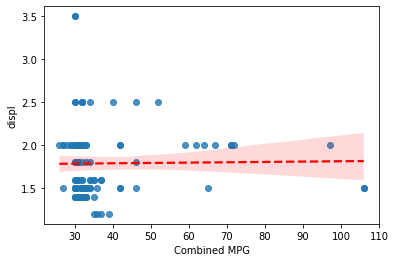

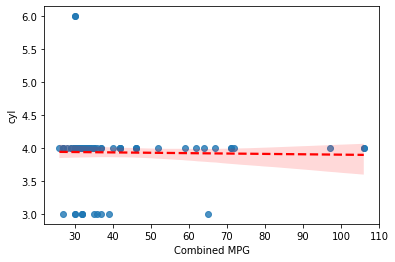

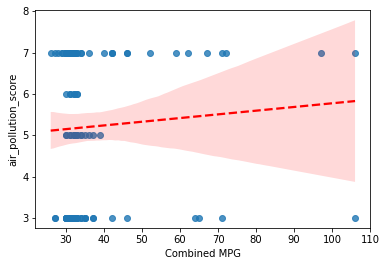

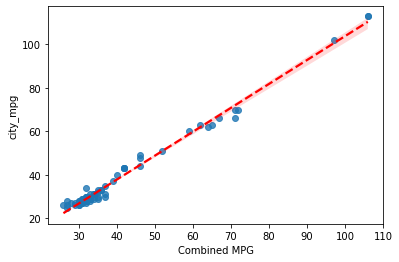

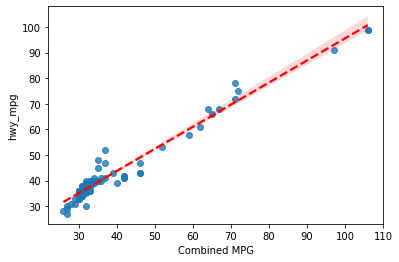

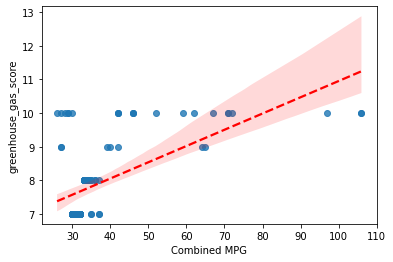

In [99]:
for col in ['displ','cyl','air_pollution_score','city_mpg','hwy_mpg','cmb_mpg','greenhouse_gas_score']:
    # Check if the column is not cmb_mpg
    if col != 'cmb_mpg':
        # Create a scatterplot with cmb_mpg on the y-axis and the current column on the x-axis
        sns.regplot(x='cmb_mpg', y=col, data=smart_18, line_kws={'linestyle':'--', 'color': 'red'})    
        plt.xlabel('Combined MPG')
        plt.ylabel(col)
        plt.show()

# Conclusions:
 There has been significant progress in improving fuel economy and reducing greenhouse gas emissions in the automotive industry, with a greater focus on alternative fuels and the production of more fuel-efficient vehicles.

### Question 1
we asked about: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?For this question,
we making a query to filter data with alternative fuels("CNG", "ethanol",Electricity"),we find that More unique models are using alternative fuels in 2018 compared to 2008. In 2008, there were only 2 unique models using alternative fuels, while in 2018, there were 26 unique models using alternative fuels, representing an increase of 1200%.

### Question 2
we asked about: How much have vehicle classes improved in fuel economy (increased in mpg)?For this question, we compare average of cmb_mpg 2008 and cmb_mpg2018 with (groupby)and,we find that Vehicle classes have significantly improved in fuel economy over 2018 by 34.12%.
### Question 3
we asked about: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)?For this question we making a query to filter data to work only on SmartWay vehicles and use  describe()function and to see the characteristics,we find that The characteristics of SmartWay vehicles have improved over time, with higher average mpg and In the case of greenhouse gas score, a higher score indicates better fuel economy and lower emissions in 2018 compared to 2008.

### Question 4
we asked about: features are associated with better fuel economy (mpg)? For this question we use describe()function and .regplot to see from visuals The effect of each feature on (mpg),we find that Features that are associated with better fuel economy (higher mpg) include smaller engine displacement, fewer cylinders, lower air pollution score, and higher greenhouse gas score

# Limitations:
Limited scope: The datasets only include information on vehicles sold in the United States, which may not be representative of global trends.
Missing data: Both datasets have missing values 
Fuel and air_pollution_score and others features are in the format of X/Y(which means that they contain two values separated by a slash (/)) In order to properly analyze these features, it was necessary to separate the values and re-merge them into two separate columns,This was done using string manipulation functions such as split() and astype(). Once the data was properly formatted and and re-merged, it was possible to analyze and draw conclusions based on the separate values.